In [0]:
from google.colab import drive
drive.mount('/content/drive')
import librosa
import numpy as np
import librosa.display
y2, sr2 = librosa.load("Speaker_0000_00000.wav")
print(y2)
print(sr2)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


ValueError: ignored

In [0]:
melspec = librosa.feature.melspectrogram(y=y2, sr=sr2)
D = librosa.stft(y2)
S, phase = librosa.magphase(D)
melspec_stft = librosa.feature.melspectrogram(S=S**2, sr=sr2)

print(np.allclose(melspec, melspec_stft))


True


<IPython.core.display.Javascript object>


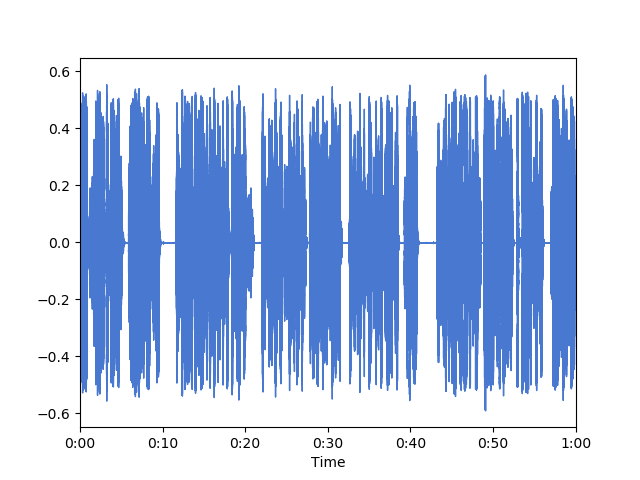

In [0]:
# Displays are built with matplotlib 
import matplotlib.pyplot as plt

# Let's make plots pretty
import matplotlib.style as ms
ms.use('seaborn-muted')

# Render figures interactively in the notebook
%matplotlib nbagg

# IPython gives us an audio widget for playback
from IPython.display import Audio
plt.figure()
librosa.display.waveplot(y=y2, sr=sr2)

<IPython.core.display.Javascript object>


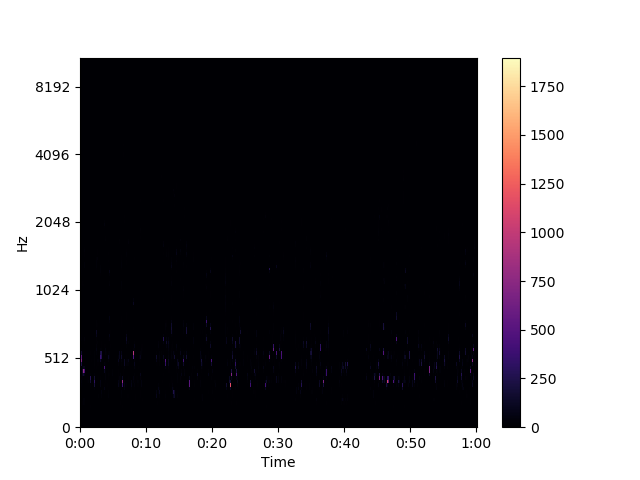

In [0]:
plt.figure()
librosa.display.specshow(melspec, y_axis='mel', x_axis='time')
plt.colorbar()
plt.show()

In [0]:
import scipy.io.wavfile as wav
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
from skimage.util.shape import view_as_windows
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
import tensorflow as tf
import librosa
import librosa.display
from scipy import misc
import pandas as pd
from matplotlib.pyplot import specgram
import math
import matplotlib.image as mpimg

#Create the Convolutional Net Functions
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
      return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
#parameters:
learning_rate_3 = 0.01
epochs_3 = 100
num_examples_3 = 1621
batch_size_3 = 16
keep_prob_3 = 0.5
    
tf.reset_default_graph()

model03 = tf.Graph()
with model03.as_default():
    with tf.device('/gpu:0'):
        
        W3_conv1 = tf.Variable(tf.truncated_normal(shape = [1, 1, 4, 16], stddev = 0.1), name = "W_0_3")
        W3_conv2 = tf.Variable(tf.truncated_normal(shape = [4, 4, 16, 32], stddev = 0.1), name = "W_1_3") 
        W3_fc1 = tf.Variable(tf.truncated_normal(shape = [41120, 512], stddev = 0.1), name = "W_2_3")
        W3_fc2 = tf.Variable(tf.truncated_normal(shape = [512, 10], stddev = 0.1), name = "W_3_3")

        b3_conv1 = tf.Variable(tf.constant(0.1, shape = [16]), name = "b_0_3")
        b3_conv2 = tf.Variable(tf.constant(0.1, shape = [32]), name = "b_1_3")
        b3_fc1 = tf.Variable(tf.constant(0.1, shape = [512]), name = "b_2_3")
        b3_fc2 = tf.Variable(tf.constant(0.1, shape = [10]), name = "b_3_3")

        x_3 = tf.placeholder(tf.float32, shape = [None, 1025, 19, 4])
        y_3 = tf.placeholder(tf.float32, shape = [None, 10])
        keep_prob = tf.placeholder(tf.float32)

        layer_1_3 = conv2d(x_3, W3_conv1)
        layer_1_3 = tf.add(layer_1_3, b3_conv1)
        layer_1_3 = tf.nn.relu(layer_1_3)
        layer_1_3 = max_pool_2x2(layer_1_3)

        layer_2_3 = conv2d(layer_1_3, W3_conv2)
        layer_2_3 = tf.add(layer_2_3, b3_conv2)
        layer_2_3 = tf.nn.relu(layer_2_3)
        layer_2_3 = max_pool_2x2(layer_2_3)
        layer_2_3_shape = layer_2_3.get_shape().as_list()

        layer_3_3 = tf.reshape(layer_2_3, [-1, layer_2_3_shape[1] * layer_2_3_shape[2] * layer_2_3_shape[3]])

        layer_4_3 = tf.add(tf.matmul(layer_3_3, W3_fc1), b3_fc1)
        layer_4_3 = tf.nn.relu(layer_4_3)
        layer_4_3 = tf.nn.dropout(layer_4_3, keep_prob)

        layer_5_3 = tf.add(tf.matmul(layer_4_3, W3_fc2), b3_fc2)

        cost_3 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = layer_5_3, labels = y_3))
        optimizer_3 = tf.train.AdamOptimizer(1e-4).minimize(cost_3)

        correct_prediction_3 = tf.equal(tf.argmax(layer_5_3, 1), tf.argmax(y_3, 1))
        accuracy_3 = tf.reduce_mean(tf.cast(correct_prediction_3, tf.float32))
    
        init = tf.global_variables_initializer()
        
tf.reset_default_graph()

def save_model_3():
    save_file_3 = './train_model_03.ckpt'
    saver3 = tf.train.Saver({"W_0_3": W3_conv1,
                            "W_1_3": W3_conv2,
                            "W_2_3": W3_fc1,
                            "W_3_3": W3_fc2,
                            "b_0_3": b3_conv1,
                            "b_1_3": b3_conv2,
                            "b_2_3": b3_fc1,
                            "b_3_3": b3_fc2})
    return saver3, save_file_3

def train_03(tfgraph, tfepochs, tfbatch, tfdropout, xtrain, ytrain, xtest, ytest, xval, yval, saver, save_file):
    start1 = timer()
    
    with tf.Session(graph = tfgraph) as sess03:
        sess03.run(init)
        
        for epoch in range(tfepochs):
            
            shuff_X_train, shuff_y_train = shuffle(xtrain, ytrain)
            
            for offset in range(0, num_examples, tfbatch):
                end = offset + tfbatch
                batch_x, batch_y = shuff_X_train[offset:end], shuff_y_train[offset:end]
                sess03.run(optimizer_3, feed_dict = {x_3: batch_x, y_3: batch_y, keep_prob: tfdropout})
            
                       
            if epoch % 5 == 0:
                shuff_X_val, shuff_y_val = shuffle(xval, yval)
                valid_accuracy = sess03.run(accuracy_3, feed_dict = {x_3: xval[:200], y_3: yval[:200], keep_prob: 1.})
                
                global temp_visualization_x #for plotting the validation accuracy during training
                temp_visualization_x.append(epoch)
                
                global temp_visualization_y #for plotting the validation accuracy during training
                temp_visualization_y.append(valid_accuracy)
                
                print("Epoch:", epoch)
                print("Validation Accuracy:", valid_accuracy)
                
            
        saver.save(sess03, save_file)
        print("")
        print("Trained Model Saved.")
        
        shuff_X_test, shuff_y_test = shuffle(xtest, ytest)
        test_accuracy = sess03.run(accuracy_3, feed_dict = {x_3: xtest[:200], y_3: ytest[:200], keep_prob: 1.})
        print("")
        print("Testing Accuracy:", test_accuracy)
        
    end1 = timer()
    print("")
    print("Time:", end1 - start1)

temp_visualization_x = []
temp_visualization_y = []

"""
training line disabled below because the network is already trained
"""
#train_03(model03, epochs_3, batch_size_3, keep_prob_3, train_out, y_train, test_out, y_test, val_out, y_val, save_model_3()[0], save_model_3()[1])


tf.reset_default_graph()

#Neural Network Testing Set Accuracy:
start1 = timer()
with tf.Session(graph = model03) as sess:
    save_model_3()[0].restore(sess, save_model_3()[1])
    feed_dict = {x_3: test_out, y_3: y_test, keep_prob: 1.}
    file_writer = tf.summary.FileWriter('./logs/3', sess.graph)
    print('Test Accuracy:', accuracy_3.eval(feed_dict = feed_dict))
tf.reset_default_graph()
end1 = timer()
print("Time to classify and calculate testing accuracy:", end1 - start1)

#visualize the accuracy vs epoch graph
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Epoch #')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Validation Set Accuracy during Training')
ax.scatter(temp_visualization_x, temp_visualization_y)

ModuleNotFoundError: No module named 'skimage'

<IPython.core.display.Javascript object>


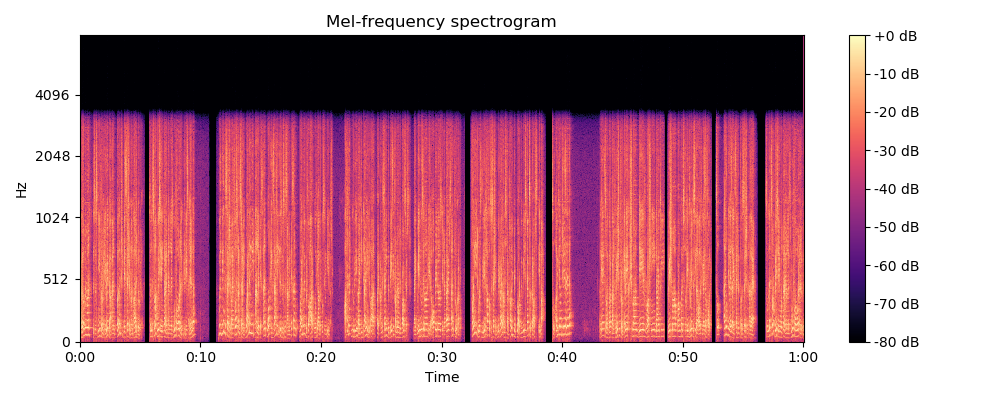

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr2,fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()